## Gradient Descent Analysis on Termite Dataset

This notebook applies the Gradient Descent algorithm to predict termite discovery using the initial and final weights of wood blocks. Our aim is to demonstrate how Gradient Descent, as an optimization technique, can be effectively utilized in a real-world ecological dataset.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\isabe\INDE 577\INDE-577\global_termite_microbe_wd.csv')
df.head()

,country,site,latitude,longitude,habitat_type,wood_used,wood_origin,N_pc,C_pc,P_pc,...,treatment,deployment_date,harvest_date,date_diff,initial_wt,final_wt,k_value,termite_discovery,fungal_damage,termite_damage
0,Argentina,EntreRios,-32.771,-58.4512,Woody savannah,Pinus_radiata,Argentina,0.250763,46.553996,0.00737,...,C,10/11/2017,2018-11-15T00:00:00Z,400,128.253,124.455,0.027455,0.0,NaN,NaN
1,Argentina,EntreRios,-32.771,-58.4512,Woody savannah,Pinus_radiata,Argentina,0.250763,46.553996,0.00737,...,C,10/11/2017,2020-01-23T00:00:00Z,834,118.588,73.688,0.208385,0.0,NaN,NaN
2,Argentina,EntreRios,-32.771,-58.4512,Woody savannah,Pinus_radiata,Argentina,0.250763,46.553996,0.00737,...,T,10/11/2017,2018-11-15T00:00:00Z,400,139.887,102.724,0.281967,0.0,NaN,NaN
3,Argentina,EntreRios,-32.771,-58.4512,Woody savannah,Pinus_radiata,Argentina,0.250763,46.553996,0.00737,...,T,10/11/2017,2020-01-23T00:00:00Z,834,152.744,109.133,0.147238,0.0,NaN,NaN
4,Argentina,EntreRios,-32.771,-58.4512,Woody savannah,Pinus_radiata,Argentina,0.250763,46.553996,0.00737,...,C,10/11/2017,2018-11-15T00:00:00Z,400,163.892,155.943,0.045400,0.0,NaN,NaN


## Data Exploration

Let's start by exploring our dataset. We'll check the structure of the data and any missing values.


In [3]:
# Filter the data if necessary and handle missing values
selected_columns = ['initial_wt', 'final_wt', 'termite_discovery']
selected_data = df[selected_columns].dropna()

# Normalizing the features (initial_wt and final_wt)
selected_data[['initial_wt', 'final_wt']] = (selected_data[['initial_wt', 'final_wt']] - selected_data[['initial_wt', 'final_wt']].mean()) / selected_data[['initial_wt', 'final_wt']].std()


## Implementing Gradient Descent

We will implement the Gradient Descent algorithm to minimize the cost function of our model. The algorithm will iteratively adjust the weights to reduce the prediction error.


In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(X.dot(weights))
    epsilon = 1e-5  # to avoid log(0)
    cost = (1/m) * ((-y).T.dot(np.log(h + epsilon)) - (1 - y).T.dot(np.log(1 - h + epsilon)))
    return cost

def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        weights = weights - (learning_rate/m) * X.T.dot(sigmoid(X.dot(weights)) - y)
        cost_history[i] = compute_cost(X, y, weights)

    return weights, cost_history


## Model Training with Gradient Descent

Next, we'll train our model using the Gradient Descent algorithm. We will track the cost function to ensure it's decreasing, indicating that our model is learning.


C:\Users\isabe\AppData\Local\Temp\ipykernel_15076\789585029.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_history[i] = compute_cost(X, y, weights)


Text(0.5, 1.0, 'Convergence of gradient descent')

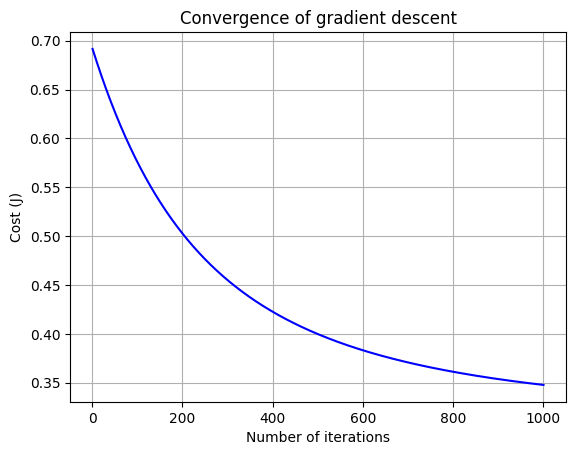

In [7]:
# Preparing the data
X = np.hstack((np.ones((selected_data.shape[0], 1)), selected_data[['initial_wt', 'final_wt']].values))
y = selected_data['termite_discovery'].values.reshape(-1,1)

# Initializing parameters
weights = np.zeros((X.shape[1], 1))
learning_rate = 0.01
iterations = 1000

# Training the model
weights, cost_history = gradient_descent(X, y, weights, learning_rate, iterations)

# Plotting the cost history
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')


## Conclusion

The Gradient Descent algorithm successfully optimized the model's weights. The cost function's convergence indicates that the model's predictions became more accurate over iterations. This approach has proven effective for predicting termite discovery in our dataset, demonstrating the practical applications of machine learning techniques in ecological studies.
